## Problem Statement 

#### Forecast the Airlines Passengers data set.

### Import all the required libraries 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')

df1= df1.set_index('Month')
df1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [4]:
df1.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [5]:
## assigning frequency to datetimeindex
df1.index.freq = 'MS' 

In [6]:
df1.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [7]:
#Shape of the dataset:-
df1.shape

(96, 1)

In [8]:
##Checking datatypes:-
df1.dtypes

Passengers    int64
dtype: object

In [9]:
##Checking null values:-
df1.isnull().sum()

Passengers    0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [11]:
df1.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


### Time Series Analysis

<AxesSubplot: xlabel='Month'>

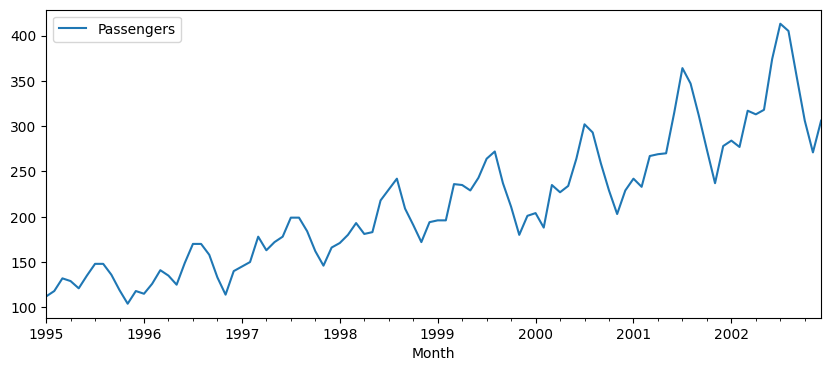

In [12]:
# Line Plot
df1.plot(figsize=(10,4))

<AxesSubplot: >

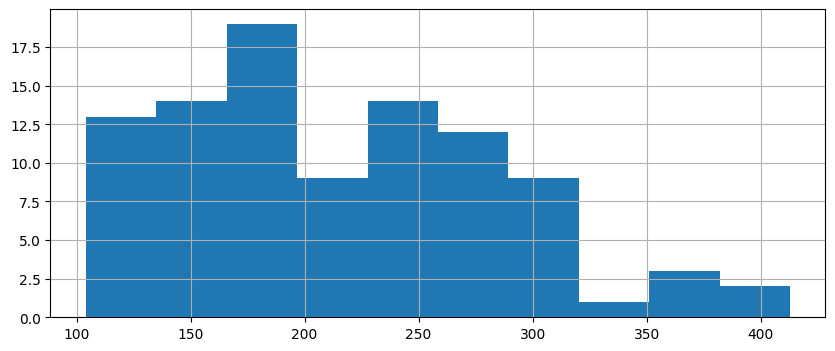

In [13]:
#Distribution(Histogram):-
df1['Passengers'].hist(figsize=(10,4))

<AxesSubplot: ylabel='Density'>

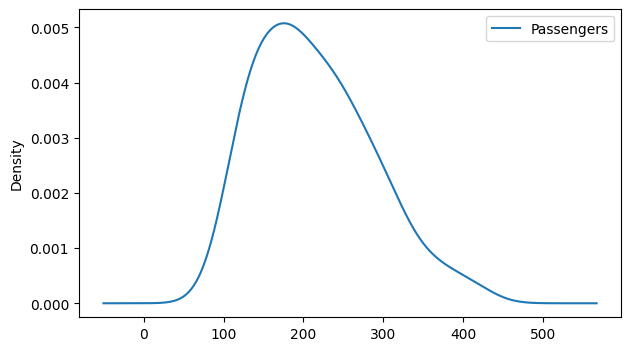

In [14]:
## Density Plot
df1.plot(kind='kde',figsize=(7,4))

### Time Series Decomposition 

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Seasonal decompose

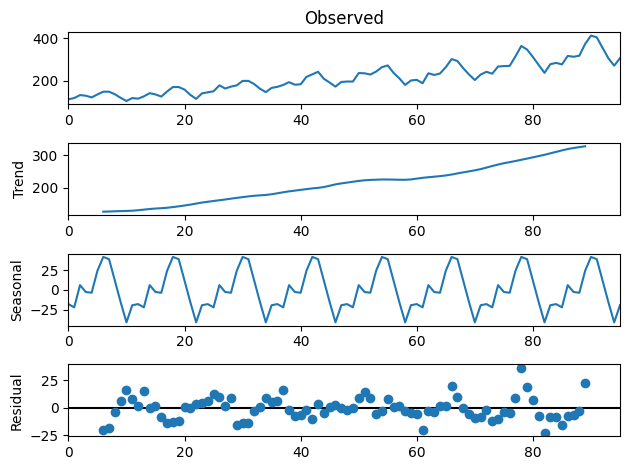

In [16]:
# frequency=12 for monthly data
ts_decomp= seasonal_decompose((df1.values),model='additive',period=12)
ts_plot = ts_decomp.plot()

### Multiplicative Seasonal Decompose

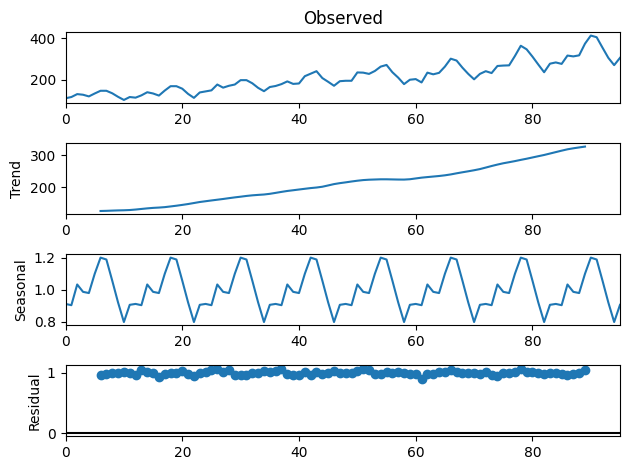

In [17]:
# frequency=12 for monthly data
ts_decomp_mul= seasonal_decompose((df1.values),model='multiplicative',period=12)
ts_plot_mul = ts_decomp_mul.plot()

### Forecasting models building

#### We will forecast last two years 2001 and 2002 so the last 24 records will be test data. And first 72 records will be training data.

In [18]:
df_train=df1[0:72]
df_test=df1[72:]

In [19]:
print("Length of train data is:",len(df_train))
print("Length of test data is:",len(df_test))

Length of train data is: 72
Length of test data is: 24


In [20]:
df_train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [21]:
df_test.head()

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270


### Forecasting Methods 

#### Simple Moving Average 

In [22]:
df_ma=df1.copy()

In [23]:
train_len=72

In [24]:
df_ma['ma_forecast'] = df_ma['Passengers'].rolling(12).mean()

In [25]:
df_ma['ma_forecast'][train_len:] = df_ma['ma_forecast'][train_len-1]

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
##Calculating RMSE and MAPE:-
rmse_ma = mean_squared_error(df_test['Passengers'],df_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

82.89

#### Simple Exponential Smoothing 

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [29]:
ses_model = SimpleExpSmoothing(df_train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = df_test.index[0],end = df_test.index[-1])

In [30]:
rmse_ses = mean_squared_error(df_test['Passengers'],pred_ses,squared=False).round(2)
rmse_ses

83.65

#### Holt's Method 

In [31]:
from statsmodels.tsa.holtwinters import Holt

In [32]:
holt_model = Holt(df_train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = df_test.index[0],end = df_test.index[-1])

In [33]:
rmse_holt = mean_squared_error(df_test['Passengers'],pred_holt,squared=False).round(2)
rmse_holt

148.19

#### Holt's Exponential Smoothing 

#### Additive method

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [35]:
hes_add_add = ExponentialSmoothing(df_train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = df_test.index[0],end = df_test.index[-1])

In [36]:
rmse_hes_add_add = mean_squared_error(df_test['Passengers'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

47.57

#### Multiplicative method

In [37]:
hes_mul_add = ExponentialSmoothing(df_train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = df_test.index[0],end = df_test.index[-1])

In [38]:
rmse_hes_mul_add = mean_squared_error(df_test['Passengers'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

34.99

### Auto Regressive (AR) model 

#### For this model, non stationary time series needs to be converted to stationary time series. ARIMA model automatically perfrorms differencing to convert non-stationary series to stationary series.

### ARIMA model 

#### ACF plot 

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

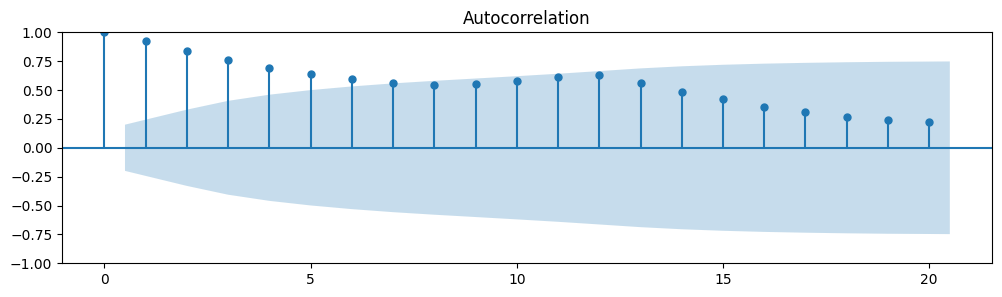

In [40]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(12,3))
acf_plot = plot_acf(df1['Passengers'],ax=plt.gca(),lags=20)
plt.show()

#### From The above plot shows that auto correlation is significant for lag = 1

### PCF plot 

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

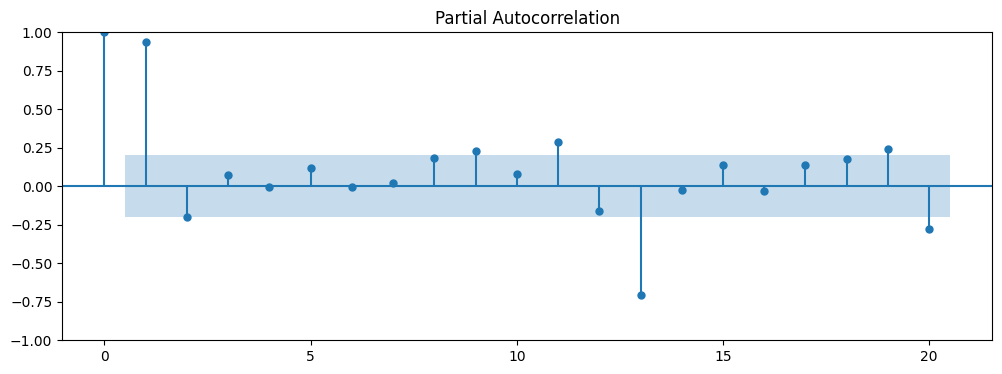

In [42]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf(df1['Passengers'],ax=plt.gca(),lags=20)
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
arima = ARIMA(df_train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = df_test.index[0],end = df_test.index[-1])

In [45]:
rmse_arima = mean_squared_error(df_test['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

88.96

### Resulting Model Comparison 

In [47]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
d={'Models':models,'Rmse':rmse}
df_model=pd.DataFrame(d)
df_model

,Models,Rmse
0,simple_moving_average,82.89
1,simple_expo_smoothing,83.65
2,Holt,148.19
3,Holt_additive,47.57
4,Holt_multiplicative,34.99
5,ARIMA,88.96


In [48]:
df_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,34.99
3,Holt_additive,47.57
0,simple_moving_average,82.89
1,simple_expo_smoothing,83.65
5,ARIMA,88.96
2,Holt,148.19


#### So Holt's exponential smoothing with multiplicative seasonality and additive trend is the best model as it has the lowest RMSE.